In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CR_train.csv to CR_train.csv
Saving CR_test.csv to CR_test.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train = pd.read_csv('CR_train.csv', encoding='cp1252')
train["credit_card_default"].value_counts(normalize=True)

,proportion
credit_card_default,
0,0.918797
1,0.081203


In [ ]:
df = train.sample(n = 30000, random_state = 42, replace = False)
df
# check shape and length
print(df.shape)

(30000, 19)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 34126 to 33325
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              30000 non-null  object 
 1   name                     30000 non-null  object 
 2   age                      30000 non-null  int64  
 3   gender                   30000 non-null  object 
 4   owns_car                 29631 non-null  object 
 5   owns_house               30000 non-null  object 
 6   no_of_children           29498 non-null  float64
 7   net_yearly_income        30000 non-null  float64
 8   no_of_days_employed      29685 non-null  float64
 9   occupation_type          30000 non-null  object 
 10  total_family_members     29944 non-null  float64
 11  migrant_worker           29947 non-null  float64
 12  yearly_debt_payments     29938 non-null  float64
 13  credit_limit             30000 non-null  float64
 14  credit_limit_used(%)   

In [ ]:
cat = [col for col in df.columns if df[col].dtypes == "object"]
num =  [col for col in df.columns if df[col].dtypes != "object"]

print("no of cat feats: ", len(cat))
print("no of num feats: ", len(num))

no of cat feats:  6
no of num feats:  13


In [ ]:
df["credit_card_default"].value_counts()

,count
credit_card_default,
0,27537
1,2463


In [ ]:
df[num].isnull().sum().sort_values(ascending=False).head(10)

,0
no_of_children,502
no_of_days_employed,315
yearly_debt_payments,62
total_family_members,56
migrant_worker,53
credit_score,6
age,0
net_yearly_income,0
credit_limit,0
credit_limit_used(%),0


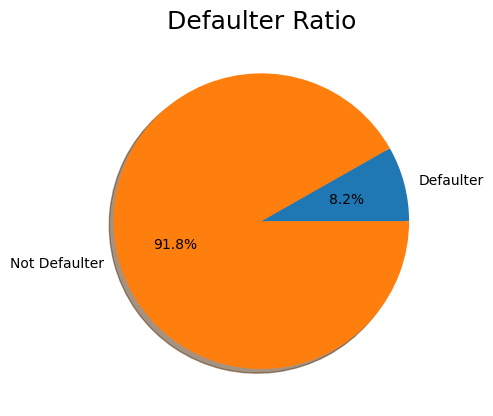

In [ ]:
# Ploting Credit_default ratio
total_default_values = df.credit_card_default.value_counts(ascending=True).values

plt.figure()
plt.pie(total_default_values, labels=['Defaulter', 'Not Defaulter'], autopct='%1.1f%%', shadow=True)
plt.title('Defaulter Ratio', fontsize=18)
plt.show()

<ipython-input-11-09eec931f20c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


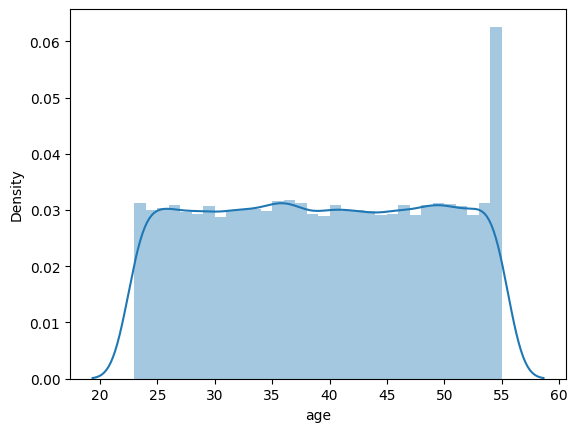

In [ ]:
# visualize AGE feature - distplot
plt.figure()
sns.distplot(df['age'])
plt.show()

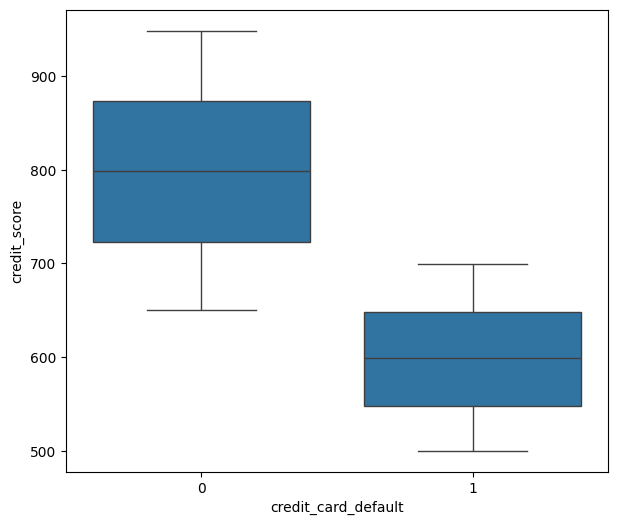

In [ ]:
# boxplot of credit_defaulter-credit_score
plt.figure(figsize=[7,6])
sns.boxplot(x='credit_card_default', y='credit_score', data=df) # Use x and y args to specify grouping and data to plot
plt.show()

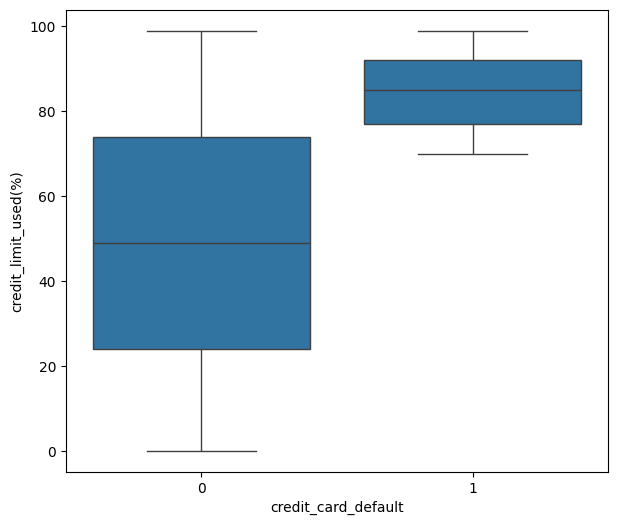

In [ ]:
# boxplot of credit_defaulter-credit_limit_utilization
plt.figure(figsize=[7,6])
sns.boxplot(x='credit_card_default', y= 'credit_limit_used(%)', data = df)
plt.show()

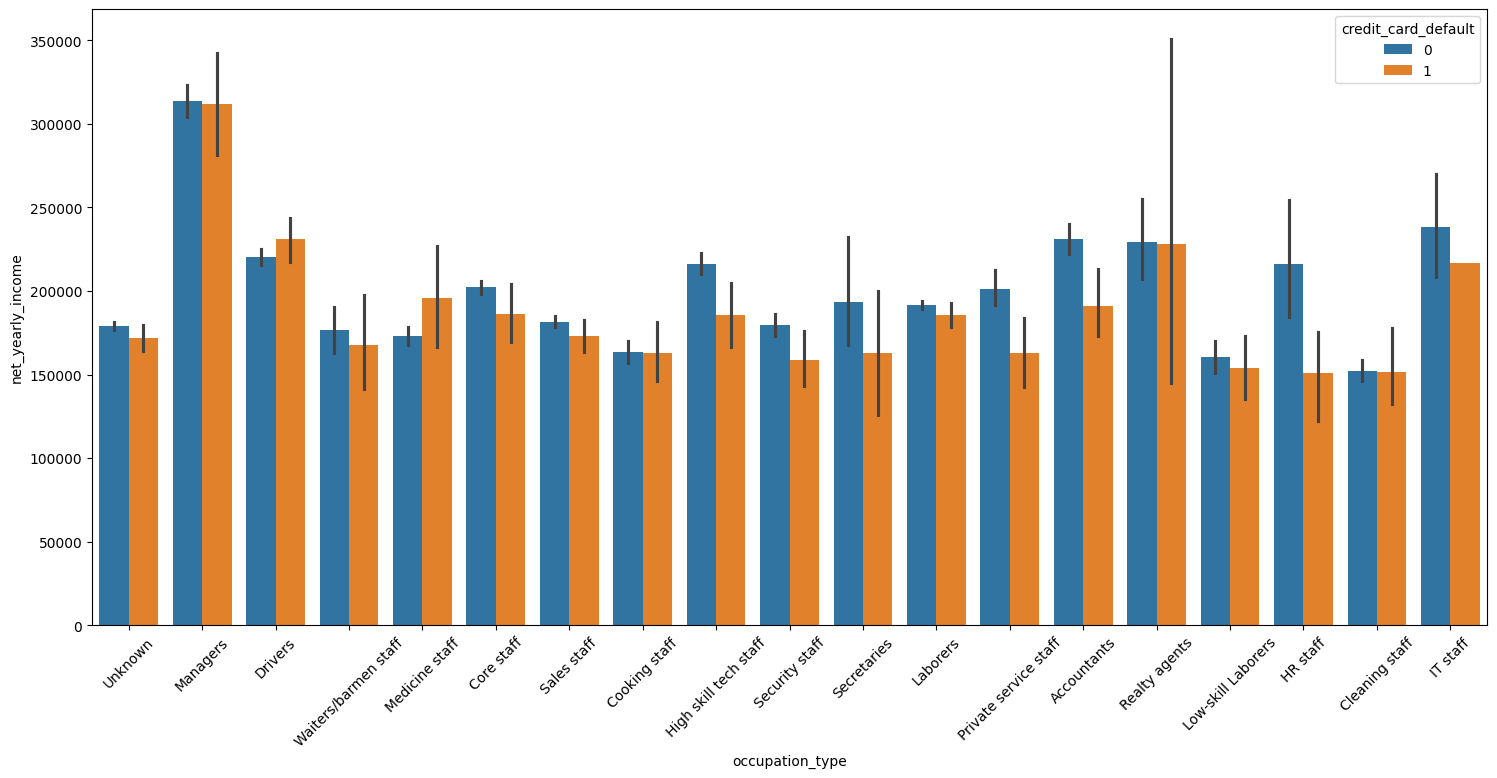

In [ ]:
# barplots for occupation types wrt credit_default
plt.figure(figsize=[18,8])
sns.barplot(x='occupation_type', y='net_yearly_income', hue='credit_card_default', data=df) # Added data=df
plt.xticks(rotation=45)
plt.show()

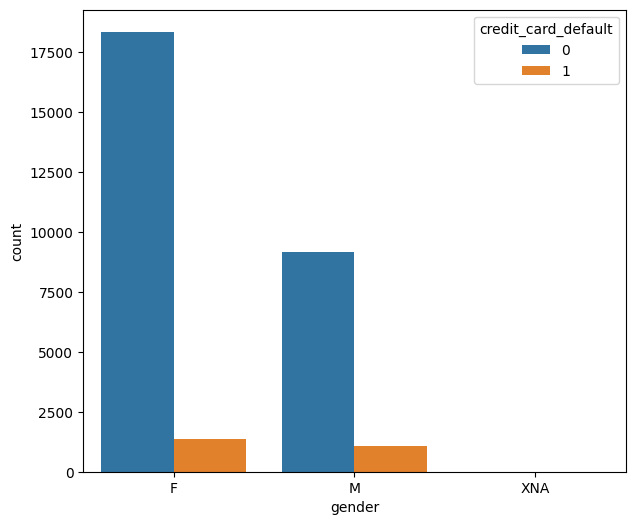

In [ ]:
# male or female defaulters
plt.figure(figsize=[7,6])
sns.countplot(x='gender', hue='credit_card_default', data=df) # Pass the entire DataFrame and specify columns for x and hue
plt.show()

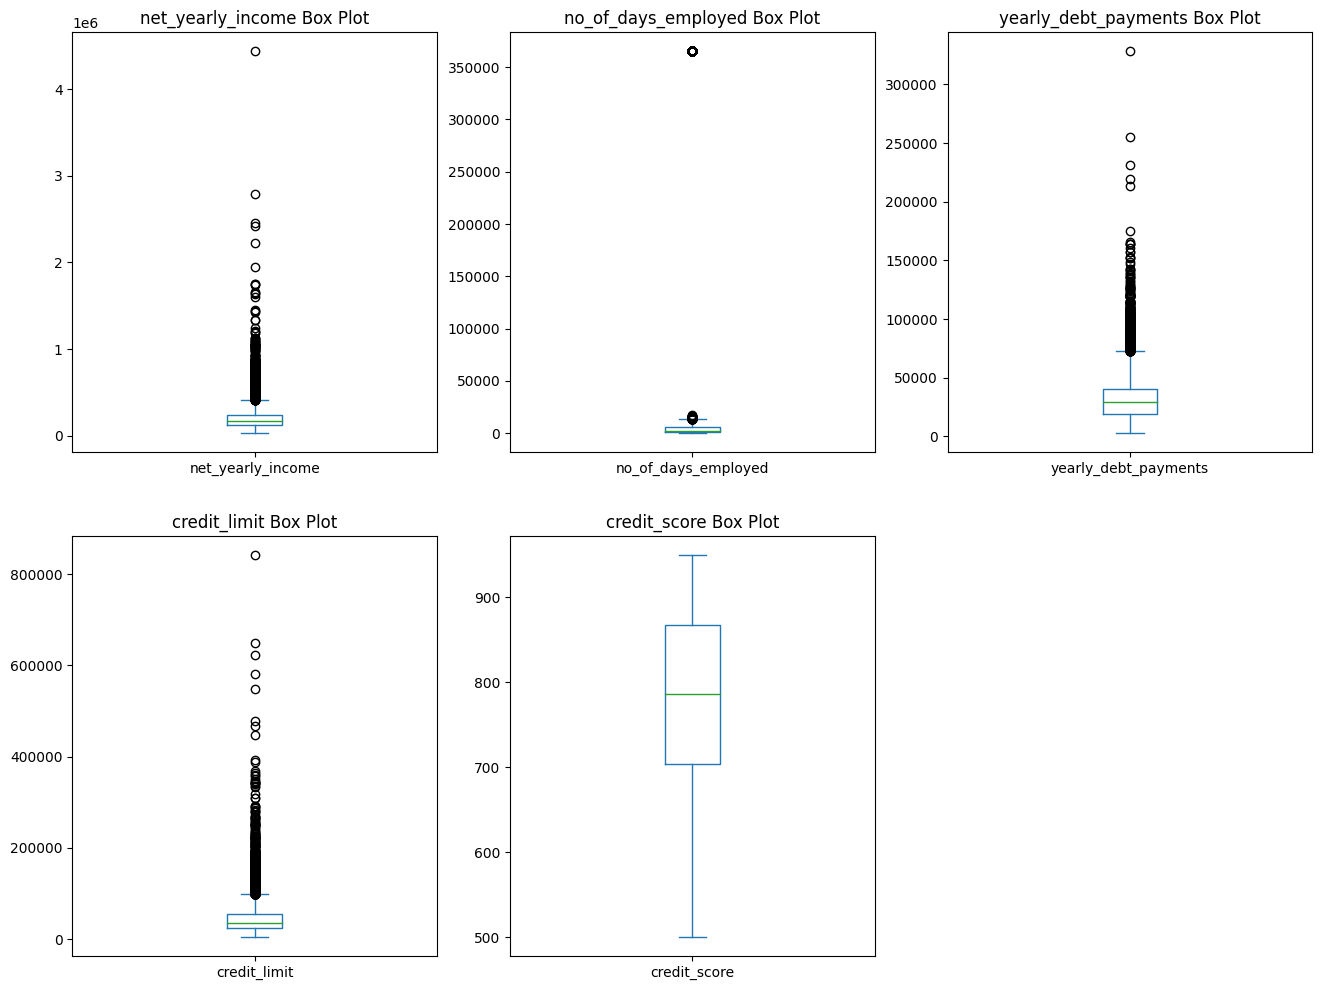

In [ ]:
# boxplot of all continuous variables

plt.figure(figsize=[16, 12])
plt.subplot(2,3,1)
df['net_yearly_income'].plot.box()
plt.title('net_yearly_income Box Plot')

plt.subplot(2,3,2)
df['no_of_days_employed'].plot.box()
plt.title('no_of_days_employed Box Plot')

plt.subplot(2,3,3)
df['yearly_debt_payments'].plot.box()
plt.title('yearly_debt_payments Box Plot')

plt.subplot(2,3,4)
df['credit_limit'].plot.box()
plt.title('credit_limit Box Plot')

plt.subplot(2,3,5)
df['credit_score'].plot.box()
plt.title('credit_score Box Plot')
plt.show()